In [1]:
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import random


def genetic_algorithm(total_set, nvar, objective_function, ngen=50, mu=20,
                      lam=40, cxpb=0.7, mutpb=0.2, tournsize=3,
                      verbose=False):
    # Creates a new class name set_mod which is based on the standard python
    # set. This means set_mod is just like set, with the addion of a fitness
    # attribute.
    creator.create("Fitness", base.Fitness, weights=(-1.0,))
    creator.create("Individual", set, fitness=creator.Fitness)
    set_mod = creator.Individual

    def random_samp(size):
        """Function to initlize individual in the population."""
        return set_mod(random.sample(total_set, size))

    def evaluation(individual):
        """Evaluate the objective function."""
        return objective_function(list(individual)),

    def cxSet(ind1, ind2):
        """Apply a crossover operation on two sets."""
        full_set = list(ind1 | ind2)
        ind1 = set_mod(random.sample(full_set, nvar))
        ind2 = set_mod(random.sample(full_set, nvar))
        return ind1, ind2

    def mutSet(individual):
        """Mutation that randomly removes and item and randomly adds an item.
        """
        temp_set = set_mod(random.sample(individual, nvar-1))
        set_to_choose = np.array(list(temp_set ^ total_set))
        new = random.choice(set_to_choose)
        temp_set.add(new)
        return temp_set,

    toolbox = base.Toolbox()

    # set up the population
    toolbox.register("individual", random_samp, nvar)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # set up the GA functions
    toolbox.register("evaluate", evaluation)
    toolbox.register("mate", cxSet)
    toolbox.register("mutate", mutSet)
    # toolbox.register("select", tools.selNSGA2)
    toolbox.register("select", tools.selTournament, tournsize=tournsize)

    # initialize the population
    pop = toolbox.population(n=mu)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    # run the GA
    algorithms.eaMuPlusLambda(pop, toolbox, mu, lam, cxpb, mutpb, ngen, stats,
                              halloffame=hof, verbose=verbose)
    return pop, hof, stats

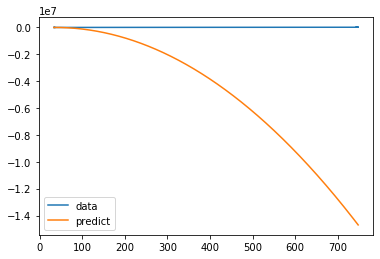

breaks:  [ 32.90733248  40.         748.29923958]


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

# generate sin wave data
n = 100
x = np.array(
    [   33.01619913,  32.90733248,  33.07592419,  33.15146426,
        33.04005198,  32.9620371 ,  33.0163474 ,  33.14329327,
        33.32311828,  33.66869515,  33.80872219,  33.85841952,
        33.71933818,  33.42553776,  33.66400745,  34.05933486,
        34.39001006,  34.51040677,  34.74365114,  36.23344779,
        36.24473804,  35.84396345,  37.05952581,  40.37155464,
        47.13083511,  54.84694319,  60.51405735,  69.53339404,
        76.38727205,  80.91660131,  91.55637486, 105.59449025,
       121.37020815, 132.49753878, 143.96631636, 154.95252135,
       163.84726806, 176.37869575, 187.91664495, 199.82979375,
       215.28766156, 228.87919224, 240.74305878, 258.57612173,
       269.85451065, 277.93054873, 287.87395685, 300.3628639 ,
       310.94480075, 321.01509768, 332.35970714, 340.01852401,
       352.49687467, 368.16488287, 378.24840713, 388.3093978 ,
       399.41570113, 409.17272176, 423.05313254, 436.82844176,
       450.00635074, 462.06823937, 472.36794405, 484.59253967,
       493.48049554, 503.04785626, 518.34942347, 527.65807355,
       536.49526995, 551.60742874, 561.45808588, 572.73035913,
       587.83842828, 600.17414834, 607.4590189 , 613.92058379,
       628.35047469, 638.7158842 , 650.83843688, 668.37427601,
       682.01271061, 692.65825918, 704.67403054, 716.27537626,
       725.90664317, 735.07517498, 742.22892342, 743.42586882,
       744.51403059, 746.41645256, 747.58526688, 748.29923958,
       747.74233749, 748.07264618, 748.18493078, 747.25369681,
       746.33906709, 745.17412707, 745.4451291 , 745.78600835,
       745.9885872 , 746.98782031, 746.51818797, 745.94675054,
       745.08114264, 743.6470843 , 744.2551252 , 746.08404389,
       746.57518873, 746.82643741, 747.33426353, 747.13978808,
       745.8245153 , 743.80859388, 743.61715234, 743.96445415,
       743.70775353, 744.28025367, 744.88356855, 745.41426997,
       745.97155094, 745.71289322, 746.56488588, 746.37397002,
       745.66436211])
y = np.array(
    [     23.31755693,    23.96713234,    24.47472717,    23.07577481,
          22.75164172,    24.81007032,    25.64171058,    22.82114931,
          29.44167541,    68.05223607,    92.98846931,   127.38427951,
         153.88373592,   183.45246451,   250.20387467,   295.59591062,
         352.06318422,   441.12790719,   530.30422345,   609.32083124,
         711.81584179,   815.00282664,   916.95717011,  1037.5965993 ,
        1213.62200664,  1400.80811385,  1544.40414169,  1754.56329309,
        1914.42343824,  2017.63492365,  2276.61663689,  2615.65857677,
        2992.87537217,  3254.2717172 ,  3530.12476347,  3779.72686381,
        4011.34339381,  4297.36612259,  4570.88089995,  4855.48628418,
        5224.04022176,  5536.60400711,  5792.90765556,  6190.03679981,
        6446.22198184,  6639.65672744,  6851.48414402,  7118.1269248 ,
        7343.75783424,  7581.54972244,  7829.30942067,  8002.27531455,
        8270.99881489,  8582.3477717 ,  8784.35588208,  8996.46073905,
        9230.37139199,  9429.62687324,  9722.29565547,  9993.63018968,
       10248.64230311, 10479.36452019, 10672.96293684, 10908.00236283,
       11074.49901777, 11257.07206215, 11555.75180822, 11741.22980275,
       11911.26604677, 12203.7709451 , 12390.73355295, 12600.46688008,
       12861.74015081, 13073.53847211, 13216.4818258 , 13329.85672066,
       13569.07043232, 13749.81025703, 13950.74535157, 14254.82435622,
       14476.66232122, 14639.82375359, 14865.68026586, 15059.49778382,
       15196.8201726 , 15347.41982951, 15466.42978647, 15489.76276711,
       15503.6410548 , 15534.65944775, 15557.24484154, 15570.58900174,
       15568.53560301, 15567.79041131, 15573.9049688 , 15554.10788979,
       15526.79725827, 15515.99157714, 15524.44944663, 15535.37637356,
       15539.3641514 , 15523.77888453, 15516.13909576, 15511.50846321,
       15503.4939414 , 15493.01142997, 15511.82652342, 15540.14138041,
       15547.98344541, 15550.79048009, 15546.76530969, 15544.67929677,
       15533.75123591, 15512.3769322 , 15511.13735916, 15503.94958809,
       15494.5690361 , 15504.79118882, 15518.7070205 , 15524.69981964,
       15533.57688215, 15536.41579082, 15549.48834064, 15554.22496028,
       15541.02678547])

number_of_line_segments = 2
degree = 3

my_pwlf = pwlf.PiecewiseLinFit(x, y, degree=degree, disp_res=False)
my_pwlf.fit(number_of_line_segments)

my_pwlf.use_custom_opt(number_of_line_segments)
total_set = set(np.floor(my_pwlf.x_data))
pop, hof, stats = genetic_algorithm(total_set, my_pwlf.nVar,
                                    my_pwlf.fit_with_breaks_opt, ngen=20,
                                    mu=125, lam=250, cxpb=0.7, mutpb=0.2,
                                    tournsize=5, verbose=False)
ssr = my_pwlf.fit_with_breaks_opt(list(hof[0]))

plt.figure()
plt.plot(x,y, label='data')
# predict
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)
plt.plot(xHat, yHat, label='predict')
plt.legend()
plt.show()

print('breaks: ', my_pwlf.fit_breaks)